In [4]:
!pip3 install rplidar-roboticia
!pip3 install matplotlib
!pip3 install numpy

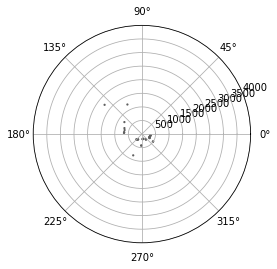

In [5]:
#!/usr/bin/env python3
'''Animates distances and measurment quality'''
from rplidar import RPLidar
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

PORT_NAME = '/dev/ttyUSB0'
DMAX = 4000
IMIN = 0
IMAX = 50

def update_line(num, iterator, line):
    scan = next(iterator)
    offsets = np.array([(np.radians(meas[1]), meas[2]) for meas in scan])
    line.set_offsets(offsets)
    intens = np.array([meas[0] for meas in scan])
    line.set_array(intens)
    return line,

def run():
    lidar = RPLidar(PORT_NAME)
    fig = plt.figure()
    ax = plt.subplot(111, projection='polar')
    line = ax.scatter([0, 0], [0, 0], s=5, c=[IMIN, IMAX],
                           cmap=plt.cm.Greys_r, lw=0)
    ax.set_rmax(DMAX)
    ax.grid(True)

    iterator = lidar.iter_scans()
    ani = animation.FuncAnimation(fig, update_line,
        fargs=(iterator, line), interval=50)
    plt.show()
    lidar.stop()
    lidar.disconnect()

if __name__ == '__main__':
    run()

In [6]:
#!/usr/bin/env python3
'''Measures sensor scanning speed'''
from rplidar import RPLidar
import time

PORT_NAME = '/dev/ttyUSB0'

def run():
    '''Main function'''
    lidar = RPLidar(PORT_NAME)
    old_t = None
    data = []
    try:
        print('Press Ctrl+C to stop')
        for _ in lidar.iter_scans():
            now = time.time()
            if old_t is None:
                old_t = now
                continue
            delta = now - old_t
            print('%.2f Hz, %.2f RPM' % (1/delta, 60/delta))
            data.append(delta)
            old_t = now
    except KeyboardInterrupt:
        print('Stoping. Computing mean...')
        lidar.stop()
        lidar.disconnect()
        delta = sum(data)/len(data)
        print('Mean: %.2f Hz, %.2f RPM' % (1/delta, 60/delta))

if __name__ == '__main__':
    run()

Press Ctrl+C to stop
7.49 Hz, 449.35 RPM
7.24 Hz, 434.44 RPM
7.53 Hz, 452.09 RPM
7.38 Hz, 442.82 RPM
7.50 Hz, 450.12 RPM
7.36 Hz, 441.50 RPM
7.26 Hz, 435.72 RPM
7.55 Hz, 453.07 RPM
7.44 Hz, 446.38 RPM
7.38 Hz, 443.05 RPM
7.36 Hz, 441.70 RPM
7.40 Hz, 444.20 RPM
7.35 Hz, 441.12 RPM
7.54 Hz, 452.29 RPM
7.40 Hz, 443.72 RPM
7.31 Hz, 438.62 RPM
7.46 Hz, 447.73 RPM
7.33 Hz, 439.64 RPM
7.51 Hz, 450.35 RPM
7.33 Hz, 439.81 RPM
7.48 Hz, 449.07 RPM
7.44 Hz, 446.24 RPM
7.41 Hz, 444.57 RPM
7.30 Hz, 438.27 RPM
7.42 Hz, 445.35 RPM
7.48 Hz, 448.64 RPM
7.38 Hz, 442.91 RPM
7.49 Hz, 449.52 RPM
7.36 Hz, 441.81 RPM
7.35 Hz, 440.75 RPM
7.44 Hz, 446.40 RPM
7.24 Hz, 434.58 RPM
7.54 Hz, 452.68 RPM
7.32 Hz, 439.45 RPM
7.46 Hz, 447.64 RPM
7.42 Hz, 445.03 RPM
7.42 Hz, 445.31 RPM
7.29 Hz, 437.11 RPM
7.51 Hz, 450.65 RPM
7.35 Hz, 441.11 RPM
7.46 Hz, 447.48 RPM
7.20 Hz, 432.06 RPM
7.51 Hz, 450.88 RPM
7.40 Hz, 444.17 RPM
7.43 Hz, 445.83 RPM
7.49 Hz, 449.54 RPM
7.35 Hz, 440.73 RPM
7.37 Hz, 442.25 RPM
7.41 Hz, 444.48 RPM

In [7]:
#!/usr/bin/env python3
'''Records scans to a given file in the form of numpy array.
Usage example:

$ ./record_scans.py out.npy'''
import sys
import numpy as np
from rplidar import RPLidar


PORT_NAME = '/dev/ttyUSB0'


def run(path):
    '''Main function'''
    lidar = RPLidar(PORT_NAME)
    data = []
    try:
        print('Recording measurments... Press Crl+C to stop.')
        for scan in lidar.iter_scans():
            data.append(np.array(scan))
    except KeyboardInterrupt:
        print('Stoping.')
    lidar.stop()
    lidar.disconnect()
    np.save(path, np.array(data))

if __name__ == '__main__':
    run(sys.argv[1])

Recording measurments... Press Crl+C to stop.
Stoping.
